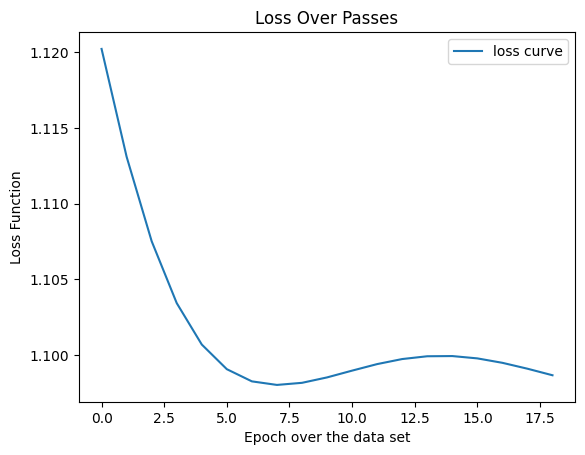

After Fitting
percent error over first 10 data points == 1.0


In [382]:
# Part 1: IrisDataset Full Classification
import csv
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import random

random.seed(42)
def extractData(path):
    """ 
    Grab all data from a csv file along its dimensions, assuming the last column is for labels
    """
    # Lists to store features and labels
    features = []
    labels = []
    # Read the CSV file
    with open(path, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Skip the header row
        for row in reader:
            features.append([float(x) for x in row[:-1]])  # Convert feature values to float
            labels.append(row[-1])  # Last column is the label
    return (features, labels)

def plotLosses(losses):
    plt.plot(losses, label="loss curve")
    plt.legend()
    plt.ylabel("Loss Function")
    plt.xlabel("Epoch over the data set")
    plt.title("Loss Over Passes")
    plt.show()

def evaluateModel(model, features, labels):
    predicted_out = model.predict(features)
    badJudgements = 0
    for pred, true in zip(predicted_out, labels):
        if pred != true: badJudgements+=1
    print("percent error over first " + str(len(labels)) + " data points == " + str(badJudgements/len(labels)))
    
features, str_labels = extractData("irisdata.csv")
labels = LabelEncoder().fit_transform(str_labels)

classifier = MLPClassifier(
    (pow(2,1), pow(2,2), pow(2,3)),
    activation="logistic",
    learning_rate="constant",
    learning_rate_init=1/(len(labels))
)
storedLosses = classifier.fit(features[5:], labels[5:]).loss_curve_

plt.plot(storedLosses, label="loss curve")
plt.legend()
plt.ylabel("Loss Function")
plt.xlabel("Epoch over the data set")
plt.title("Loss Over Passes")
plt.show()

print("After Fitting")
evaluateModel(classifier, features[:10], labels[:10])

In [383]:
# Part 2: Exploring non-linearities
import csv
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import random

class BuildPerceptron:
    def __init__(self, hiddenLayers=(1,1), activationFunction="identity", learningRate="constant", epsilon=1/100):
        self.layers = hiddenLayers
        self.nonlinearity = activationFunction
        self.learning_rate = learningRate
        self.epsilon = epsilon
    
    def modifyParams(self, hiddenLayers=None, activationFunction=None, learningRate=None, epsilon=None):
        if hiddenLayers: self.layers=hiddenLayers
        if activationFunction: self.nonlinearity=activationFunction
        if learningRate: self.learning_rate=learningRate
        if epsilon: self.epsilon=epsilon
    
    def buildPerceptron(self):
        return MLPClassifier(
            self.layers,
            activation=self.nonlinearity,
            learning_rate=self.learning_rate,
            learning_rate_init=self.epsilon,
            max_iter=100000
        )

class BreakData:
    def __init__(self, dataset):
        features, labels = self.grabData(dataset)
        self.trainingSet = (features[:3 * int(len(features)/4)], labels[:3 * int(len(labels)/4)])
        self.testingSet = (features[len(self.trainingSet[0]):], labels[len(self.trainingSet[1]):])
    
    def training(self):
        return self.trainingSet

    def testing(self):
        return self.testingSet
    
    def grabData(self, path):
        """ 
        Grab all data from a csv file along its dimensions, assuming the last column is for labels
        """
        # Lists to store features and labels
        features = []
        labels = []
        # Read the CSV file
        with open(path, 'r') as file:
            reader = csv.reader(file)
            header = next(reader)  # Skip the header row
            for row in reader:
                features.append([float(x) for x in row[:-1]])  # Convert feature values to float
                labels.append(row[-1])  # Last column is the label
        return (features, LabelEncoder().fit_transform(labels))

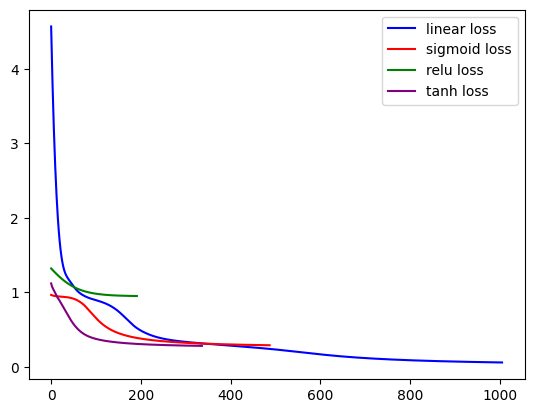

linear == 0.15384615384615385
sigmoid == 1.0
relu == 1.0
tanh == 1.0


In [384]:
# Part 2: Exploring non-linearities (script) 

# first break up our data and set up our perceptron builder
data = BreakData("irisdata.csv")
mlpBuilder = BuildPerceptron((3, 1), "identity", "constant", 1/100)

# grab our training and testing set
trainX, trainY = data.training()
testX, testY = data.testing()

# next create...
linearMLP = mlpBuilder.buildPerceptron() # standard single layer linear NN
mlpBuilder.modifyParams(activationFunction="logistic")
sigmoidMLP = mlpBuilder.buildPerceptron() # logistic/sigmoid nonlinear NN
mlpBuilder.modifyParams(activationFunction="relu") 
reluMLP = mlpBuilder.buildPerceptron() # rectified linear unit nonlinear NN
mlpBuilder.modifyParams(activationFunction="tanh")
tanhMLP = mlpBuilder.buildPerceptron() # hyperbolic tan function nonlinear NN

# compute loss curves for each
linearLoss = linearMLP.fit(trainX, trainY).loss_curve_
sigmoidLoss = sigmoidMLP.fit(trainX, trainY).loss_curve_
reluLoss = reluMLP.fit(trainX, trainY).loss_curve_
tanhLoss = tanhMLP.fit(trainX, trainY).loss_curve_

# plot these curves
plt.plot(linearLoss, label="linear loss", color="blue")
plt.plot(sigmoidLoss, label="sigmoid loss", color="red")
plt.plot(reluLoss, label="relu loss", color="green")
plt.plot(tanhLoss, label="tanh loss", color="purple")
plt.legend()
plt.show()

# how does each perform on unseen data - leverage slightly improved function from part 1 which now handles multiple models
def evaluations(models, features, labels):
    modelNames = ["linear", "sigmoid", "relu", "tanh"]
    for model, modelNames in zip(models, modelNames):
        predicted_out = model.predict(features)
        badJudgements = 0
        for pred, true in zip(predicted_out, labels):
            if pred != true: badJudgements+=1
        print(modelNames + " == " + str(badJudgements/len(labels)))

evaluations([linearMLP, sigmoidMLP, reluMLP, tanhMLP], testX, testY)

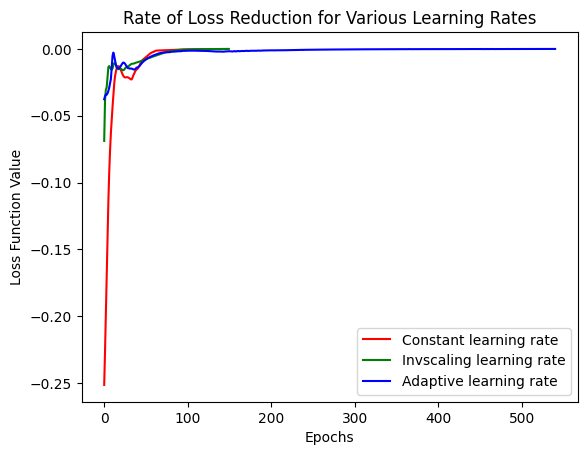

Training Data Performances...
Constant Learning Rate: 0.9009009009009009
Invscaling Learning Rate: 0.9009009009009009
Adaptive Learning Rate: 1.0

 Test Data Performance...
Training Data Performances...
Constant Learning Rate: 0.0
Invscaling Learning Rate: 0.0
Adaptive Learning Rate: 0.7948717948717948


In [385]:
# Part 3: Exploring algorithms for adjusting the learning rate
mlpBuilder.modifyParams(hiddenLayers=(5,3,5), activationFunction="relu", epsilon=0.01)

# each of our models
mlpBuilder.modifyParams(learningRate="constant")
constantLearning = mlpBuilder.buildPerceptron()

mlpBuilder.modifyParams(learningRate="invscaling")
invscalingLearning = mlpBuilder.buildPerceptron()

mlpBuilder.modifyParams(learningRate="adaptive")
adaptiveLearning = mlpBuilder.buildPerceptron()

# build our own way to calculate rate of training loss
def derivativeTrainingLoss(trainingDataOverEpochs):
    derivative = []
    for idx, datapt in enumerate(trainingDataOverEpochs):
        if idx > 0:
            derivative.append(datapt - trainingDataOverEpochs[idx - 1])
    return derivative

# fit each model
constantLossFunction = constantLearning.fit(trainX, trainY).loss_curve_
invscalingLossFunction = invscalingLearning.fit(trainX, trainY).loss_curve_
adaptiveLossFunction = adaptiveLearning.fit(trainX, trainY).loss_curve_

# compute derivativeTrainingLoss on each
derivativeConstant = derivativeTrainingLoss(constantLossFunction)
derivativeInvscaling = derivativeTrainingLoss(invscalingLossFunction)
derivativeAdaptive = derivativeTrainingLoss(adaptiveLossFunction)

# plot derivatives
plt.plot(derivativeConstant, label="Constant learning rate", color="red")
plt.plot(derivativeInvscaling, label="Invscaling learning rate", color="green")
plt.plot(derivativeAdaptive, label="Adaptive learning rate", color="blue")
plt.title("Rate of Loss Reduction for Various Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss Function Value")
plt.legend()
plt.show()

# Inform Performance For Training Data
print("Training Data Performances...")
print("Constant Learning Rate: " + str(constantLearning.score(trainX, trainY)))
print("Invscaling Learning Rate: " + str(invscalingLearning.score(trainX, trainY)))
print("Adaptive Learning Rate: " + str(adaptiveLearning.score(trainX, trainY)))

# Inform Performance for Test Data
print("\n Test Data Performance...")
print("Training Data Performances...")
print("Constant Learning Rate: " + str(constantLearning.score(testX, testY)))
print("Invscaling Learning Rate: " + str(invscalingLearning.score(testX, testY)))
print("Adaptive Learning Rate: " + str(adaptiveLearning.score(testX, testY)))